# 슈퍼마켓 매출 예측하기

In [5]:
from google.colab import drive
drive.mount('/content/drive/')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive/


In [0]:
import numpy as np
import pandas as pd
from pandas import Series, DataFrame
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [6]:
train = pd.read_csv('drive/My Drive/DSAC_M3/Train.txt')
test = pd.read_csv('drive/My Drive/DSAC_M3/Test.txt')
train.shape

(8523, 12)

In [7]:
train.head().T

,0,1,2,3,4
Item_Identifier,FDA15,DRC01,FDN15,FDX07,NCD19
Item_Weight,9.3,5.92,17.5,19.2,8.93
Item_Fat_Content,Low Fat,Regular,Low Fat,Regular,Low Fat
Item_Visibility,0.0160473,0.0192782,0.0167601,0,0
Item_Type,Dairy,Soft Drinks,Meat,Fruits and Vegetables,Household
Item_MRP,249.809,48.2692,141.618,182.095,53.8614
Outlet_Identifier,OUT049,OUT018,OUT049,OUT010,OUT013
Outlet_Establishment_Year,1999,2009,1999,1998,1987
Outlet_Size,Medium,Medium,Medium,NaN,High
Outlet_Location_Type,Tier 1,Tier 3,Tier 1,Tier 3,Tier 3


In [0]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
Item_Identifier              8523 non-null object
Item_Weight                  7060 non-null float64
Item_Fat_Content             8523 non-null object
Item_Visibility              8523 non-null float64
Item_Type                    8523 non-null object
Item_MRP                     8523 non-null float64
Outlet_Identifier            8523 non-null object
Outlet_Establishment_Year    8523 non-null int64
Outlet_Size                  6113 non-null object
Outlet_Location_Type         8523 non-null object
Outlet_Type                  8523 non-null object
Item_Outlet_Sales            8523 non-null float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.1+ KB


### 두 개의 입력 특성만 사용

In [0]:
X = train.loc[:,['Outlet_Establishment_Year','Item_MRP']]

In [0]:
from sklearn.linear_model import LinearRegression
lreg = LinearRegression()

In [10]:
np.random.seed(7)
x_train, x_test, y_train, y_test = train_test_split(X,train.Item_Outlet_Sales, test_size=0.3)
lreg.fit(x_train,y_train)
pred = lreg.predict(x_test)

# 오차 자승의 평균, mse 계산
mse = np.mean((pred - y_test)**2)
# mse와 rmse출력
mse, mse**(0.5)


(1990314.4086564458, 1410.7850327588699)

In [11]:
coeff = DataFrame(x_train.columns)
coeff['Coefficient Estimate'] = Series(lreg.coef_)
coeff

,0,Coefficient Estimate
0,Outlet_Establishment_Year,-9.633438
1,Item_MRP,15.641581


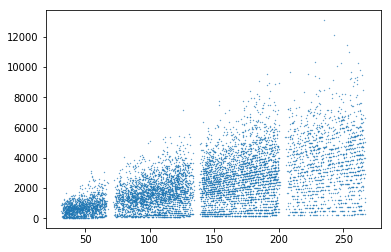

In [0]:
plt.scatter(train.Item_MRP, train.Item_Outlet_Sales,s=0.1)

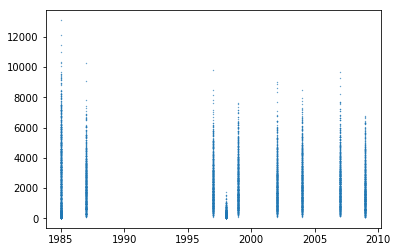

In [0]:
plt.scatter(train.Outlet_Establishment_Year,train.Item_Outlet_Sales, s=0.1)

In [12]:
lreg.score(x_test,y_test)

0.3242020337746537

## 모든 입력 특성을 사용

In [13]:
train.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

## 데이터 전처리


In [0]:
train['Item_Weight'].fillna((train['Item_Weight'].mean()), inplace=True)

In [15]:
train.Item_Visibility.value_counts().head(10)

0.000000    526
0.076975      3
0.041283      2
0.085622      2
0.187841      2
0.134976      2
0.107224      2
0.085275      2
0.076856      2
0.059836      2
Name: Item_Visibility, dtype: int64

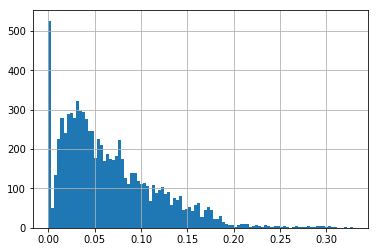

In [0]:
train.Item_Visibility.hist(bins=100)

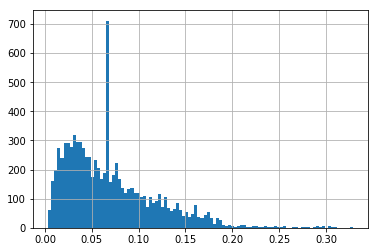

In [16]:
train['Item_Visibility'] = train['Item_Visibility'].replace(0,np.mean(train['Item_Visibility']))
train.Item_Visibility.hist(bins=100)

In [17]:
train.Outlet_Establishment_Year.value_counts()

1985    1463
1987     932
1999     930
1997     930
2004     930
2002     929
2009     928
2007     926
1998     555
Name: Outlet_Establishment_Year, dtype: int64

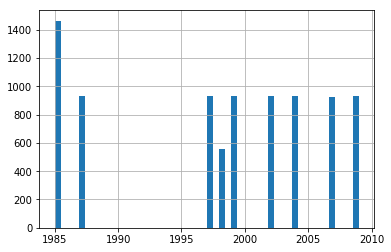

In [0]:
train.Outlet_Establishment_Year.hist(bins=50)

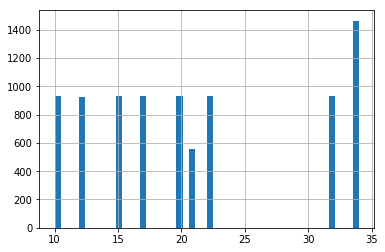

In [18]:
train['Outlet_Establishment_Year'] = 2019 - train['Outlet_Establishment_Year']
train.Outlet_Establishment_Year.hist(bins=50)

In [19]:
train.Outlet_Size.isnull().sum()

2410

In [20]:
train.Outlet_Size.value_counts()

Medium    2793
Small     2388
High       932
Name: Outlet_Size, dtype: int64

In [0]:
train['Outlet_Size'].fillna('Small',inplace=True)

In [22]:
train.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

In [0]:
train.drop("Item_Identifier", axis = 1, inplace=True)

## 카테고리 인코딩

In [24]:
object_list = list(train.select_dtypes(include=['object']).columns)
object_list

['Item_Fat_Content',
 'Item_Type',
 'Outlet_Identifier',
 'Outlet_Size',
 'Outlet_Location_Type',
 'Outlet_Type']

In [25]:
dummies = pd.get_dummies(train[object_list],prefix=object_list)
dummies.head(10).T

,0,1,2,3,4,5,6,7,8,9
Item_Fat_Content_LF,0,0,0,0,0,0,0,0,0,0
Item_Fat_Content_Low Fat,1,0,1,0,1,0,0,1,0,0
Item_Fat_Content_Regular,0,1,0,1,0,1,1,0,1,1
Item_Fat_Content_low fat,0,0,0,0,0,0,0,0,0,0
Item_Fat_Content_reg,0,0,0,0,0,0,0,0,0,0
Item_Type_Baking Goods,0,0,0,0,0,1,0,0,0,0
Item_Type_Breads,0,0,0,0,0,0,0,0,0,0
Item_Type_Breakfast,0,0,0,0,0,0,0,0,0,0
Item_Type_Canned,0,0,0,0,0,0,0,0,0,0
Item_Type_Dairy,1,0,0,0,0,0,0,0,0,0


In [26]:
X1 = train.drop(object_list, axis=1)
X1.head()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
0,9.30,0.016047,249.8092,20,3735.1380
1,5.92,0.019278,48.2692,10,443.4228
2,17.50,0.016760,141.6180,20,2097.2700
3,19.20,0.066132,182.0950,21,732.3800
4,8.93,0.066132,53.8614,32,994.7052


In [0]:
y = X1.Item_Outlet_Sales
X1 = X1.drop('Item_Outlet_Sales',1)

In [0]:
X = pd.concat([X1,dummies],axis = 1)

In [29]:
dummies.shape, X1.shape, X.shape

((8523, 41), (8523, 4), (8523, 45))

## 4개의 특성만 사용하는 경우

In [30]:
np.random.seed(7)
x_train, x_test,y_train,y_test = train_test_split(X1,y,test_size=0.3)
lreg.fit(x_train,y_train)
pred_test = lreg.predict(x_test)
mse = np.mean((pred_test - y_test)**2)
print(mse**0.5)
print(lreg.score(x_test,y_test))

1387.9151553183913
0.3459348199771226


In [33]:
# 45개의 모든 특성을 사용하는 경우
np.random.seed(7)
x_train, x_test, y_train, y_test = train_test_split(X,y,test_size=0.3)
lreg.fit(x_train,y_train)
pred_test = lreg.predict(x_test)
mse = np.mean((pred_test - y_test)**2)
print(mse**0.5)
print(lreg.score(x_test,y_test))

1152.9420299803558
0.5486534404110447


## 오차 플롯

Text(0.5, 1.0, 'Residual plot')

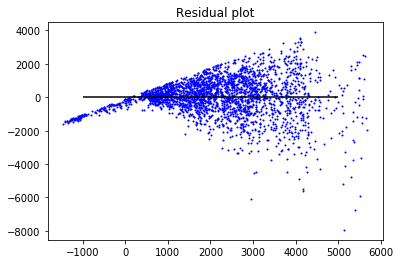

In [34]:
x_plot = plt.scatter(pred_test,(pred_test - y_test), c='b',s=1)
plt.hlines(y=0, xmin = -1000, xmax = 5000)
plt.title('Residual plot')

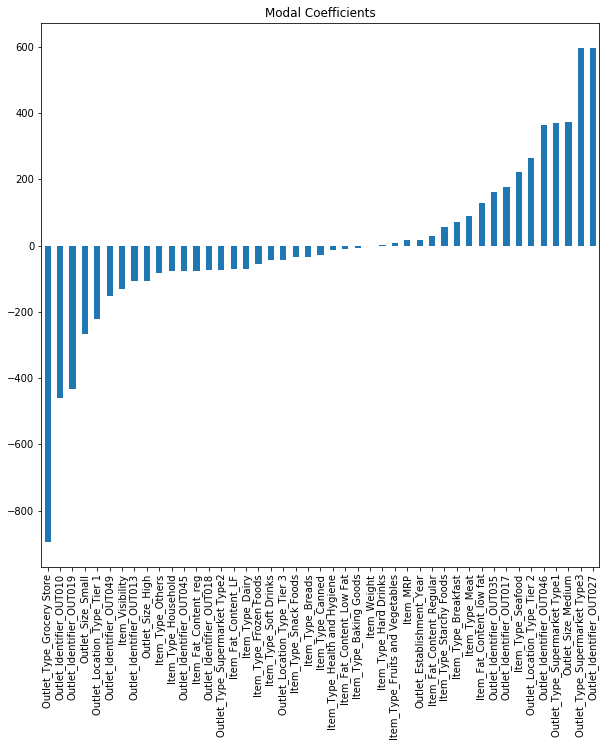

In [35]:
plt.figure(figsize = (10,10))
predictors = X.columns
coef = Series(lreg.coef_,predictors).sort_values()
coef.plot(kind='bar',title='Modal Coefficients')

## 릿지 규제

In [38]:
from sklearn.linear_model import Ridge
ridgeReg = Ridge(alpha=0.05, normalize=True)
ridgeReg.fit(x_train,y_train)
pred = ridgeReg.predict(x_test)
mse = np.mean((pred_test - y_test)**2)
mse**2, ridgeReg.score(x_test,y_test)


(1766972888311.8818, 0.5491731608147645)

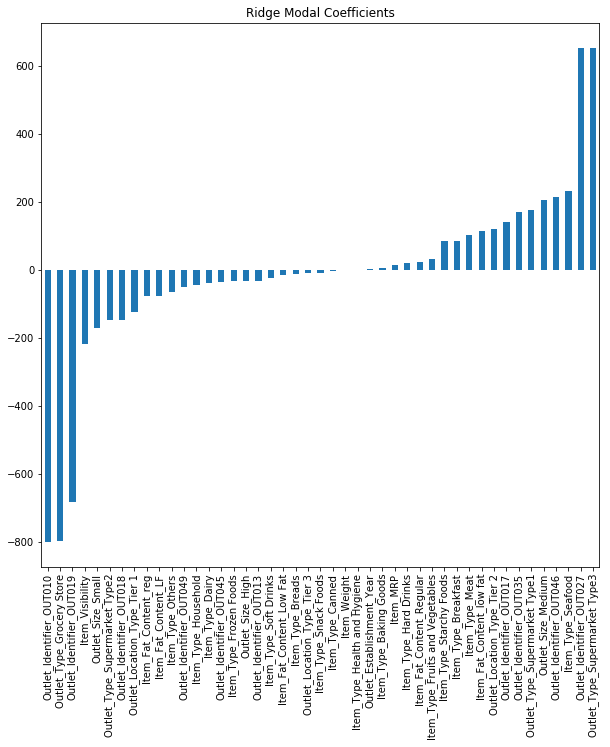

In [39]:
plt.figure(figsize = (10,10))
predictors = X.columns
coef = Series(ridgeReg.coef_,predictors).sort_values()
coef.plot(kind='bar', title = 'Ridge Modal Coefficients')

In [40]:
alpha = [0.001, 0.01, 0.05, 0.5, 1]
for a in alpha:
  ridgeReg = Ridge(alpha = a, normalize=True)
  ridgeReg.fit(x_train,y_train)
  print('a=',a,'R square = ', ridgeReg.score(x_test, y_test))

a= 0.001 R square =  0.5486826382589223
a= 0.01 R square =  0.5489082444202531
a= 0.05 R square =  0.5491731608147645
a= 0.5 R square =  0.5137188639777166
a= 1 R square =  0.45920700914344165


## 라쏘 규제

In [41]:
from sklearn.linear_model import Lasso
lassoReg = Lasso(alpha = 0.05, normalize=True)
lassoReg.fit(x_train,y_train)
print(lassoReg.score(x_test,y_test))

0.5493981055951234


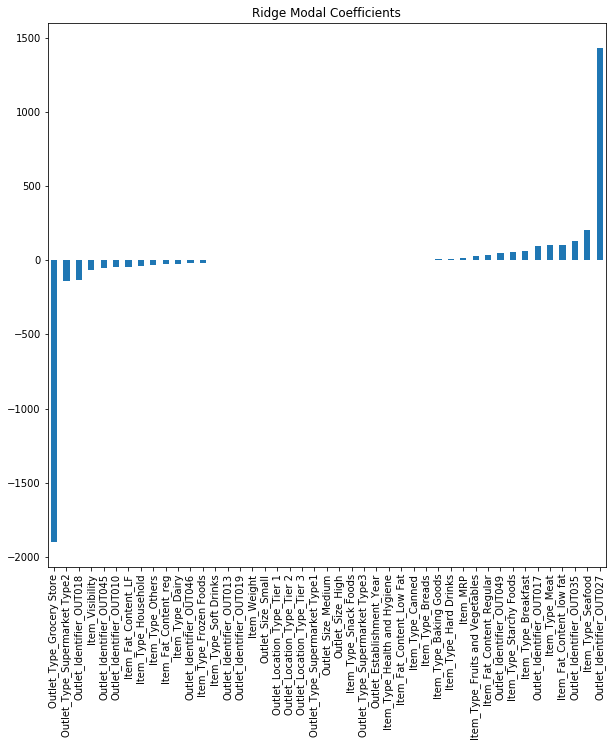

In [42]:
plt.figure(figsize = (10,10))
predictors = X.columns
coef = Series(lassoReg.coef_, predictors).sort_values()
coef.plot(kind='bar',title='Ridge Modal Coefficients')